# 데이터 불러오기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import tensorflow as tf


np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./datasets/sonar.csv', header=None)
print(df.shape)
df.head()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# 모델 설정 & 실행

In [3]:
dataset = df.values
X = dataset[:, 0:60]
X = np.asarray(X).astype(np.float32)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs=200, batch_size=5)

print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 883us/step - loss: 0.6816 - accuracy: 0.6058
Epoch 2/200
42/42 [==============================] - 0s 786us/step - loss: 0.6546 - accuracy: 0.6250
Epoch 3/200
42/42 [==============================] - 0s 842us/step - loss: 0.6333 - accuracy: 0.6635
Epoch 4/200
42/42 [==============================] - 0s 922us/step - loss: 0.6048 - accuracy: 0.6971
Epoch 5/200
42/42 [==============================] - 0s 836us/step - loss: 0.5737 - accuracy: 0.7692
Epoch 6/200
42/42 [==============================] - 0s 773us/step - loss: 0.5537 - accuracy: 0.7596
Epoch 7/200
42/42 [==============================] - 0s 758us/step - loss: 0.5154 - accuracy: 0.7692
Epoch 8/200
42/42 [==============================] - 0s 765us/step - loss: 0.4914 - accuracy: 0.7596
Epoch 9/200
42/42 [==============================] - 0s 749us/step - loss: 0.4777 - accuracy: 0.7837
Epoch 10/200
42/42 [==============================] - 0s 762us/step - loss: 0.4597 - accura

# loss & accuracy 시각화 

In [4]:
loss = history.history['loss']
acc = history.history['accuracy']

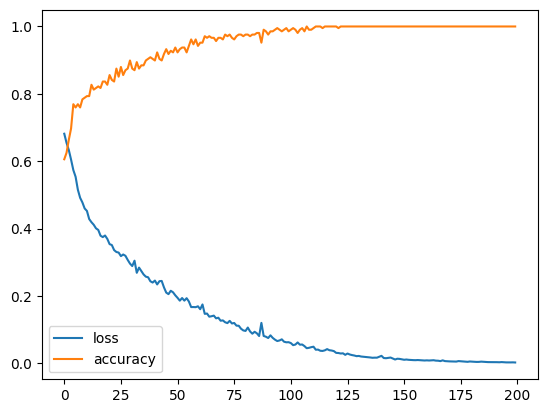

In [5]:
import matplotlib.pyplot as plt

plt.plot(loss, label='loss')
plt.plot(acc, label='accuracy')
plt.legend()
plt.show()

# train / test 나눠서 과적합 피하기

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

In [7]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=5)
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

Epoch 1/50
29/29 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.4966
Epoch 2/50
29/29 [==============================] - 0s 950us/step - loss: 0.2422 - accuracy: 0.5517
Epoch 3/50
29/29 [==============================] - 0s 992us/step - loss: 0.2361 - accuracy: 0.6207
Epoch 4/50
29/29 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.6828
Epoch 5/50
29/29 [==============================] - 0s 958us/step - loss: 0.2219 - accuracy: 0.7310
Epoch 6/50
29/29 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.7241
Epoch 7/50
29/29 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.7517
Epoch 8/50
29/29 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.7448
Epoch 9/50
29/29 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.7724
Epoch 10/50
29/29 [==============================] - 0s 948us/step - loss: 0.1826 - accuracy: 0.8138
Epoch 11/50

# 와인 데이터

## 데이터 불러오기 & label 지정

In [19]:
red_df = pd.read_csv('./datasets/winequality-red.csv', delimiter=';')
white_df = pd.read_csv('./datasets/winequality-white.csv', delimiter=';')

In [20]:
red_df['label'] = 1
white_df['label'] = 0

In [21]:
wine_df = pd.concat([red_df, white_df], axis=0)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [22]:
X = wine_df.drop('label', axis=1)
y = wine_df[['label']]

## 모델 설정

In [23]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X, y, validation_split=0.33, epochs=3500, batch_size=500)
history

Epoch 1/3500
9/9 [==============================] - 1s 18ms/step - loss: 1.2241 - accuracy: 0.1946 - val_loss: 0.4854 - val_accuracy: 0.9371
Epoch 2/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.6303 - val_loss: 0.2070 - val_accuracy: 0.9991
Epoch 3/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.5264 - accuracy: 0.6760 - val_loss: 0.1609 - val_accuracy: 0.9981
Epoch 4/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.7217 - val_loss: 0.1825 - val_accuracy: 0.9949
Epoch 5/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.7925 - val_loss: 0.2177 - val_accuracy: 0.9860
Epoch 6/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.4159 - accuracy: 0.8856 - val_loss: 0.2334 - val_accuracy: 0.9767
Epoch 7/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.8869 - val_loss: 0.1656 - val_accuracy: 0.9855
Epoch 8/3500
9/9 [=

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## test 데이터에 대한 loss / accuracy 값 확인

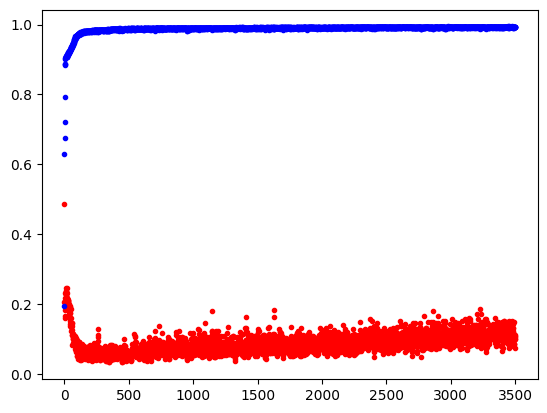

In [28]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

## 학습 자동 중단 설정

### 100번 동안 테스트셋 오차가 나아지지 않으면 중단

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=100)

### 모델 저장 폴더 만들기

In [32]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

### 모델 업데이트 및 저장

In [33]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

### 학습 자동 중단 설정

In [34]:
model.fit(X, y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.10950, saving model to ./model\01-0.1095.hdf5

Epoch 2: val_loss improved from 0.10950 to 0.07704, saving model to ./model\02-0.0770.hdf5

Epoch 3: val_loss did not improve from 0.07704

Epoch 4: val_loss did not improve from 0.07704

Epoch 5: val_loss did not improve from 0.07704

Epoch 6: val_loss did not improve from 0.07704

Epoch 7: val_loss did not improve from 0.07704

Epoch 8: val_loss did not improve from 0.07704

Epoch 9: val_loss did not improve from 0.07704

Epoch 10: val_loss did not improve from 0.07704

Epoch 11: val_loss did not improve from 0.07704

Epoch 12: val_loss did not improve from 0.07704

Epoch 13: val_loss did not improve from 0.07704

Epoch 14: val_loss improved from 0.07704 to 0.07651, saving model to ./model\14-0.0765.hdf5

Epoch 15: val_loss did not improve from 0.07651

Epoch 16: val_loss did not improve from 0.07651

Epoch 17: val_loss did not improve from 0.07651

Epoch 18: val_loss did not improve from 0.07651

# boston housing 데이터

## 데이터 불러오기

In [37]:
from sklearn.datasets import load_boston

boston = load_boston()

In [44]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [82]:
X = bostonDF.drop('PRICE', axis=1)
y = bostonDF[['PRICE']]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## 모델 설정

In [84]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1)) # 선형 회귀 데이터는 출력층에 활성화 함수 지정할 필요 없음

In [85]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [86]:
model.fit(X_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
36/36 [==============================] - 0s 788us/step - loss: 6861.8579
Epoch 2/1000
36/36 [==============================] - 0s 761us/step - loss: 564.2410
Epoch 3/1000
36/36 [==============================] - 0s 800us/step - loss: 200.9533
Epoch 4/1000
36/36 [==============================] - 0s 836us/step - loss: 135.2362
Epoch 5/1000
36/36 [==============================] - 0s 817us/step - loss: 96.3731
Epoch 6/1000
36/36 [==============================] - 0s 846us/step - loss: 78.6264
Epoch 7/1000
36/36 [==============================] - 0s 792us/step - loss: 67.8504
Epoch 8/1000
36/36 [==============================] - 0s 932us/step - loss: 61.1111
Epoch 9/1000
36/36 [==============================] - 0s 861us/step - loss: 56.8884
Epoch 10/1000
36/36 [==============================] - 0s 975us/step - loss: 53.0736
Epoch 11/1000
36/36 [==============================] - 0s 908us/step - loss: 50.6541
Epoch 12/1000
36/36 [==============================] - 0s 829us/step 

## 예측값과 실제값 비교

In [87]:
y_pred = model.predict(X_test).flatten()

for i in range(10):
    label = (y_test['PRICE'].values)[i]
    prediction = y_pred[i]
    print('실제가격: {:.3f}, 예상가격: {:.3f}'.format(label, prediction))

5/5 [==============================] - 0s 752us/step
실제가격: 23.400, 예상가격: 23.502
실제가격: 8.100, 예상가격: 17.780
실제가격: 22.000, 예상가격: 26.830
실제가격: 15.000, 예상가격: 27.142
실제가격: 10.400, 예상가격: 13.097
실제가격: 14.900, 예상가격: 14.675
실제가격: 20.300, 예상가격: 21.357
실제가격: 8.400, 예상가격: 17.247
실제가격: 46.000, 예상가격: 45.223
실제가격: 29.100, 예상가격: 26.037
